In [1]:
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

from src.definitions import ROOT_DIR
from src.definitions import KEYS_TO_LITHOLOGY

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
plt.style.use('seaborn-poster')

# Load train data

In [4]:
train_path = ROOT_DIR / 'data/external' / 'CSV_train.csv'

assert train_path.is_file()

In [5]:
train = pd.read_csv(train_path, sep=';')

# Load test data

In [6]:
test_path = ROOT_DIR / 'data/external' / 'CSV_test.csv'

assert test_path.is_file()

In [7]:
test = pd.read_csv(test_path, sep=';')

# Wells per group

In [8]:
train.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [9]:
len(train['WELL'].unique())

98

In [10]:
for group_name, group in train.groupby('GROUP'):
    
    group_unique_well_len = len(group['WELL'].unique())
    
    print(f'Group {group_name} has {group_unique_well_len} wells')

Group BAAT GP. has 40 wells
Group BOKNFJORD GP. has 2 wells
Group CROMER KNOLL GP. has 78 wells
Group DUNLIN GP. has 53 wells
Group HEGRE GP. has 21 wells
Group HORDALAND GP. has 67 wells
Group NORDLAND GP. has 38 wells
Group ROGALAND GP. has 70 wells
Group ROTLIEGENDES GP. has 3 wells
Group SHETLAND GP. has 81 wells
Group TYNE GP. has 2 wells
Group VESTLAND GP. has 25 wells
Group VIKING GP. has 84 wells
Group ZECHSTEIN GP. has 8 wells


## Group of groups

The groups with low well count can be grouped as follows:

1. VTB: Viking (84) / Tyne (2) / Bonkfjord (2): 88 wells total.

2. Permian: Rotliegendes (3) / Zechstein (8): 11 wells total.

In [11]:
group_of_groups = {
    'VIKING GP.': 'VTB GP.',
    'BOKNFJORD GP.': 'VTB GP.',
    'TYNE GP.': 'VTB GP.',
    'ROTLIEGENDES GP.': 'PERMIAN GP.',
    'ZECHSTEIN GP.': 'PERMIAN GP.',
    }

In [12]:
train['GROUPED'] = train['GROUP']

In [13]:
train['GROUPED'].replace(group_of_groups, inplace=True)

In [14]:
for group_name, group in train.groupby('GROUPED'):
    
    group_unique_well_len = len(group['WELL'].unique())
    
    print(f'Group {group_name} has {group_unique_well_len} wells')

Group BAAT GP. has 40 wells
Group CROMER KNOLL GP. has 78 wells
Group DUNLIN GP. has 53 wells
Group HEGRE GP. has 21 wells
Group HORDALAND GP. has 67 wells
Group NORDLAND GP. has 38 wells
Group PERMIAN has 8 wells
Group ROGALAND GP. has 70 wells
Group SHETLAND GP. has 81 wells
Group VESTLAND GP. has 25 wells
Group VTB has 88 wells


The wells with ROTLIEGENDES GP. and ZECHSTEIN GP. are the same, thus the total well count for the new PERMIAN group is 8 well.

In [15]:
cond0 = train['GROUP'] == 'ROTLIEGENDES GP.'
cond1 = train['GROUP'] == 'ZECHSTEIN GP.'

In [16]:
zech_wells = set(train.loc[cond0, 'WELL'].unique())

In [17]:
print(zech_wells)

{'16/4-1', '16/2-16', '16/1-2'}


In [18]:
rot_wells = set(train.loc[cond1, 'WELL'].unique())

In [19]:
print(rot_wells)

{'16/10-1', '16/4-1', '16/2-16', '16/1-2', '16/11-1 ST3', '15/9-13', '16/2-6', '17/11-1'}


In [20]:
for well in zech_wells:
    print(well in rot_wells)

True
True
True


# Samples per group

In [21]:
train.shape

(1170511, 30)

In [22]:
for group_name, group in train.groupby('GROUPED'):
    
    group_sample_len = len(group['GR'])
    
    print(f'Group {group_name} has {group_sample_len} samples')

Group BAAT GP. has 35823 samples
Group CROMER KNOLL GP. has 52320 samples
Group DUNLIN GP. has 119085 samples
Group HEGRE GP. has 13913 samples
Group HORDALAND GP. has 293155 samples
Group NORDLAND GP. has 111490 samples
Group PERMIAN has 15030 samples
Group ROGALAND GP. has 131944 samples
Group SHETLAND GP. has 234028 samples
Group VESTLAND GP. has 26116 samples
Group VTB has 136329 samples


## Samples per group per lithology

In [84]:
for group_name, group in train.groupby('GROUPED'):
    train_group_vc = group['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts(dropna=False)
    
    for lith, count in train_group_vc.items():
        if count <= 5:
            print(group_name)
            print(lith)
            cond = group['FORCE_2020_LITHOFACIES_LITHOLOGY'] != lith
            group = group.loc[cond, :]
            print(group['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique())
    
#     print(group_name)
#     print(train_group_vc)
    print()








ROGALAND GP.
Chalk
['Sandstone' 'Tuff' 'Shale' 'Limestone' 'Sandstone/Shale' 'Marl'
 'Dolomite']

SHETLAND GP.
Anhydrite
['Limestone' 'Marl' 'Shale' 'Chalk' 'Sandstone' 'Sandstone/Shale'
 'Dolomite']

VESTLAND GP.
Halite
['Sandstone' 'Shale' 'Sandstone/Shale' 'Limestone' 'Coal' 'Dolomite']




In [24]:
litho_dict = {'Sandstone'      : '#FFFF00',
              'Shale'          : '#825000',
              'Sandstone/Shale': '#FF7800',
              'Limestone'      : '#00BEFF',
              'Chalk'          : '#00FFFF',
              'Dolomite'       : '#783CA0',
              'Marl'           : '#006400',
              'Anhydrite'      : '#C878C8',
              'Halite'         : '#FFDCFF',
              'Coal'           : '#000000',
              'Basement'       : '#FF00FF',
              'Tuff'           : '#32EBB9'
             }

In [25]:
train['FORCE_2020_LITHOFACIES_LITHOLOGY'].replace(KEYS_TO_LITHOLOGY, inplace=True)

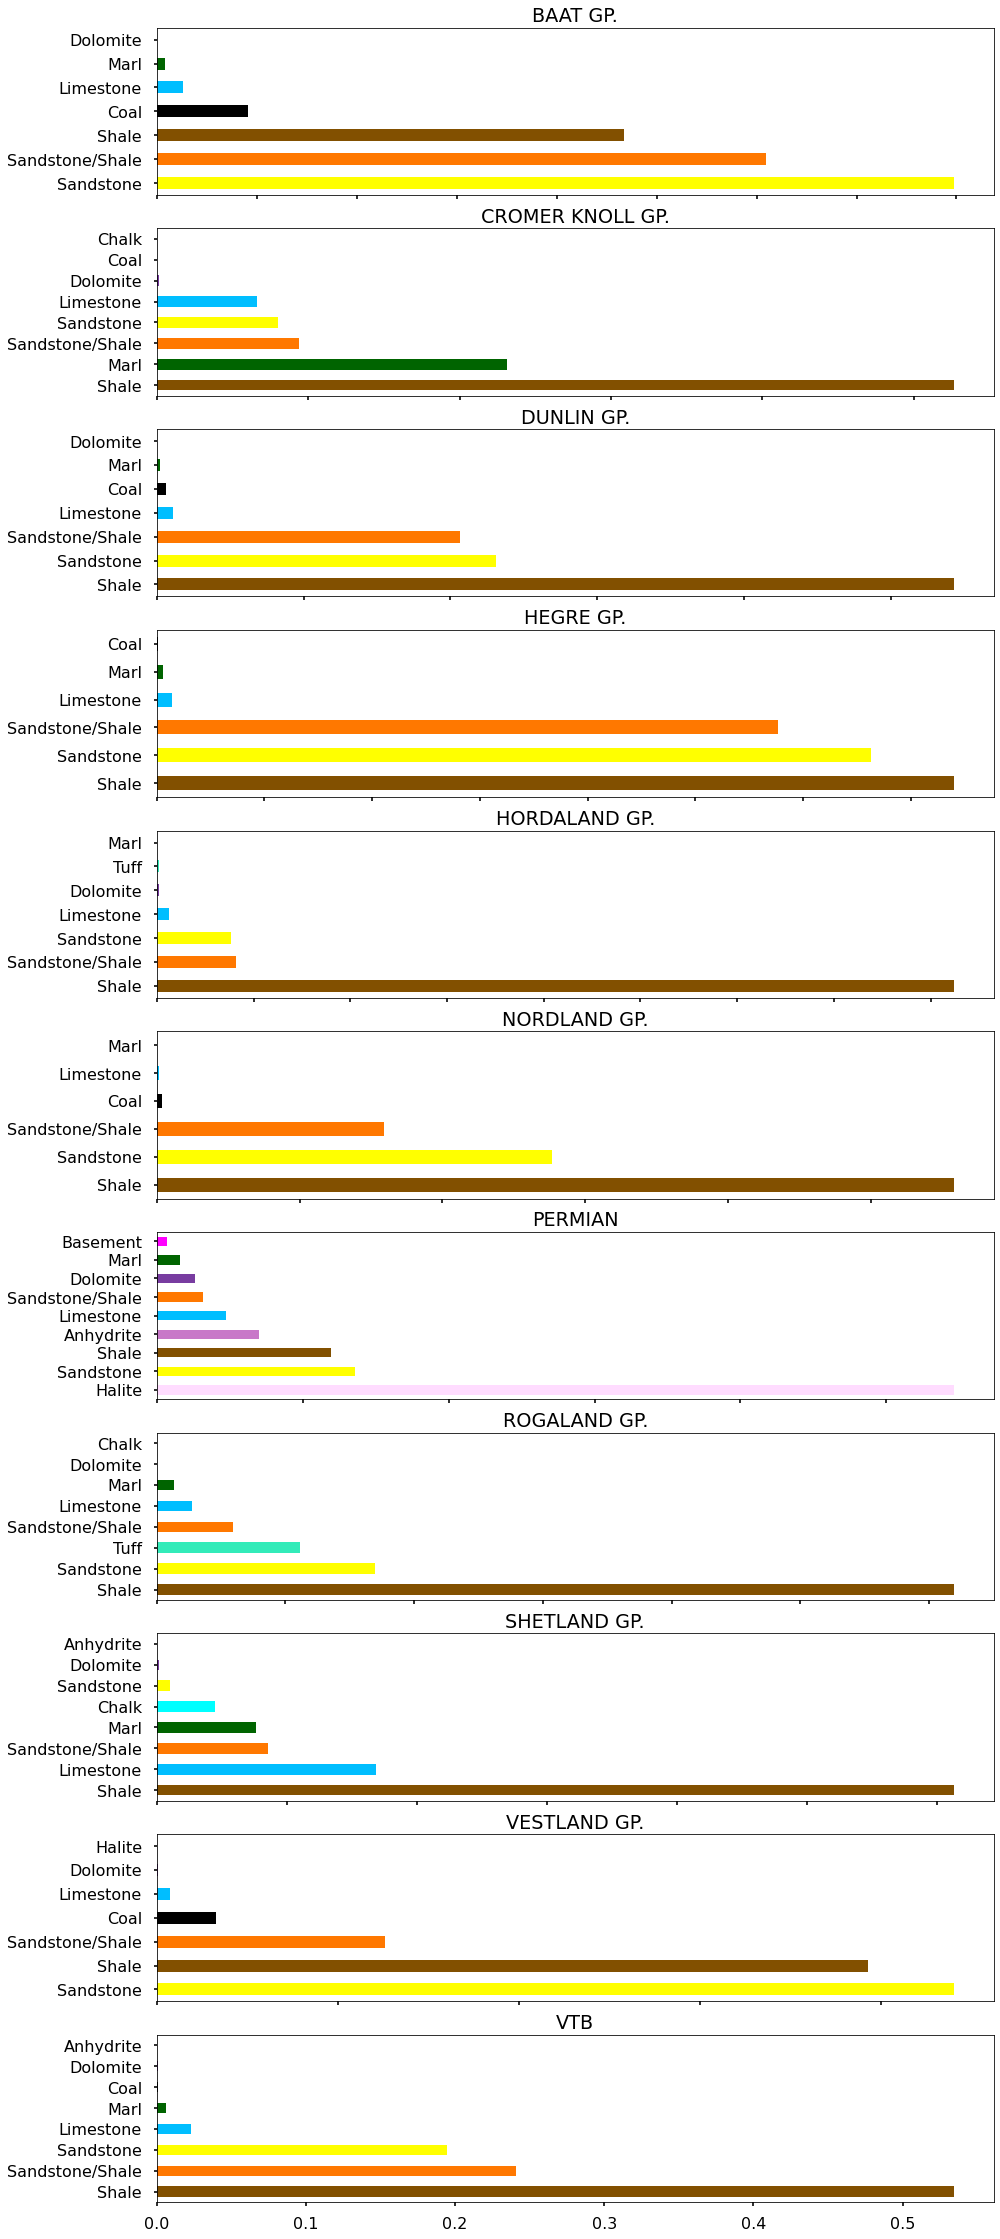

In [26]:
fig, axes = plt.subplots(11, 1, figsize=(15, 40))

for group_data, ax  in zip(train.groupby('GROUPED'), axes.flat):
    group_name, group = group_data
    
    value_counts = group['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts(normalize=True)
    value_counts.plot(kind='barh',
                      ax=ax,
                      title=group_name,
                      sharex=True,
                      color = [litho_dict[lith] for lith in value_counts.index]
                      )

# Well logs per group

In [27]:
(~train.isna()).sum()

WELL                                 1170511
DEPTH_MD                             1170511
X_LOC                                1159736
Y_LOC                                1159736
Z_LOC                                1159736
GROUP                                1169233
FORMATION                            1033517
CALI                                 1082634
RSHA                                  630650
RMED                                 1131518
RDEP                                 1159496
RHOB                                 1009242
GR                                   1170511
SGR                                    69353
NPHI                                  765409
PEF                                   671692
DTC                                  1089648
SP                                    864247
BS                                    682657
ROP                                   535071
DTS                                   174613
DCAL                                  298833
DRHO      

In [28]:
all_groups_log_coverage = []
for group_data in train.groupby('GROUPED'):
    group_name, group = group_data
    
    group_log_coverage = (~group.isna()).sum() / group.shape[0]
    
    group_log_coverage.name = group_name
    
    all_groups_log_coverage.append(group_log_coverage)

In [31]:
all_groups_log_coverage_df = pd.concat(all_groups_log_coverage, axis=1)

In [40]:
all_groups_log_coverage_df.style.background_gradient(cmap='YlGnBu', axis=0)

,BAAT GP.,CROMER KNOLL GP.,DUNLIN GP.,HEGRE GP.,HORDALAND GP.,NORDLAND GP.,PERMIAN,ROGALAND GP.,SHETLAND GP.,VESTLAND GP.,VTB
WELL,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
DEPTH_MD,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
X_LOC,1.000000,0.985168,1.000000,0.998778,0.998765,0.984133,0.694278,1.000000,0.995125,0.976643,0.997997
Y_LOC,1.000000,0.985168,1.000000,0.998778,0.998765,0.984133,0.694278,1.000000,0.995125,0.976643,0.997997
Z_LOC,1.000000,0.985168,1.000000,0.998778,0.998765,0.984133,0.694278,1.000000,0.995125,0.976643,0.997997
GROUP,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
FORMATION,1.000000,1.000000,1.000000,1.000000,0.813641,0.272724,1.000000,1.000000,1.000000,1.000000,1.000000
CALI,0.995924,0.870260,0.970240,0.999712,0.908693,0.827240,0.999468,0.880768,0.949527,1.000000,0.981053
RSHA,0.748569,0.564163,0.634757,0.532308,0.501448,0.491712,0.364072,0.544390,0.432717,0.739776,0.671647
RMED,0.954024,0.975956,0.973767,0.998778,0.984152,0.933241,0.347305,0.985130,0.985886,0.974575,0.971275


## Missing coordinates

There are some coordinates missing:

In [50]:
permian_wells = train['GROUPED'] == 'PERMIAN'

missing_coord = train['Z_LOC'].isna()

train.loc[permian_wells & missing_coord, 'WELL'].unique()

array(['16/11-1 ST3'], dtype=object)

Well 16/11-1 ST3 coordinates are missing. This well was [drilled in 1967](https://factpages.npd.no/en/wellbore/PageView/With/Wdss/112), so it is possible that the diviation survey is lost.

## Observations

With this information we can build a model for each group, using the most common logs from that group, e.g. the ROP log can be used in the Permian and Vestland groups, but not in the other.

Also, there are a few logs that have little presence in any group, so it is best to drop them first. These include:
SGR,
DTS,
DCAL,
RMIC,
ROPA,
RXO.

## Logs per group

In [67]:
limit = 0.68
keep_logs_per_group = {}
for group_data in train.groupby('GROUPED'):
    group_name, group = group_data
    
    group_log_coverage = (~group.isna()).sum() / group.shape[0]
    
    cond_more_than_limit = group_log_coverage > limit
    
    keep_logs = [log for log, val in cond_more_than_limit.items() if val]
    
    keep_logs_per_group[group_name] = keep_logs

In [68]:
keep_logs_per_group

{'BAAT GP.': ['WELL',
  'DEPTH_MD',
  'X_LOC',
  'Y_LOC',
  'Z_LOC',
  'GROUP',
  'FORMATION',
  'CALI',
  'RSHA',
  'RMED',
  'RDEP',
  'RHOB',
  'GR',
  'NPHI',
  'DTC',
  'SP',
  'DRHO',
  'FORCE_2020_LITHOFACIES_LITHOLOGY',
  'FORCE_2020_LITHOFACIES_CONFIDENCE',
  'GROUPED'],
 'CROMER KNOLL GP.': ['WELL',
  'DEPTH_MD',
  'X_LOC',
  'Y_LOC',
  'Z_LOC',
  'GROUP',
  'FORMATION',
  'CALI',
  'RMED',
  'RDEP',
  'RHOB',
  'GR',
  'NPHI',
  'DTC',
  'DRHO',
  'FORCE_2020_LITHOFACIES_LITHOLOGY',
  'FORCE_2020_LITHOFACIES_CONFIDENCE',
  'GROUPED'],
 'DUNLIN GP.': ['WELL',
  'DEPTH_MD',
  'X_LOC',
  'Y_LOC',
  'Z_LOC',
  'GROUP',
  'FORMATION',
  'CALI',
  'RMED',
  'RDEP',
  'RHOB',
  'GR',
  'NPHI',
  'DTC',
  'SP',
  'DRHO',
  'FORCE_2020_LITHOFACIES_LITHOLOGY',
  'FORCE_2020_LITHOFACIES_CONFIDENCE',
  'GROUPED'],
 'HEGRE GP.': ['WELL',
  'DEPTH_MD',
  'X_LOC',
  'Y_LOC',
  'Z_LOC',
  'GROUP',
  'FORMATION',
  'CALI',
  'RMED',
  'RDEP',
  'RHOB',
  'GR',
  'NPHI',
  'DTC',
  'SP',
  'B

1. Build grouped column

2. Drop cols: 
    SGR, DTS, DCAL, RMIC, ROPA, RXO
    GROUP

2. Group by grouped
    2.1 Select cols from keep_logs_per_group
    2.2 Stratify split
    2.3 Train
    2.4 Predict
    

    

In [74]:
for group_data in train.groupby('GROUPED'):
    group_name, group = group_data
    
    print(group_name)
    print(group.columns)
    print()

BAAT GP.
Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE', 'GROUPED'],
      dtype='object')

CROMER KNOLL GP.
Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE', 'GROUPED'],
      dtype='object')

DUNLIN GP.
Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
     